In [1]:
# Autor: Daniel Pinto
# Arboles Binarios
# Fecha: 2021/09/29 YYYY/MM/DD
from typing import List, TypeVar, Tuple, Any, Callable, Optional, Generic
from hypothesis import given, strategies as st
from IPython.display import Markdown, display
from itertools import accumulate
from functools import reduce
from dataclasses import dataclass
from __future__ import annotations 
from copy import deepcopy
from collections.abc import  Iterable
import graphviz



def display_(s : str) -> None:
    '''
    A way to display strings with markdown 
    in jupyter.
    '''
    display(
        Markdown(s)
    )


SUCCESS_COLOR = '#4BB543'
ERROR_COLOR   = '#B00020'

def color_text(s : str, color : str =SUCCESS_COLOR ) -> str:
    return f"<span style='color:{color}'> {s} </span>."


a      = TypeVar('a')
b      = TypeVar('b')
c      = TypeVar('c')
T      = TypeVar('T')


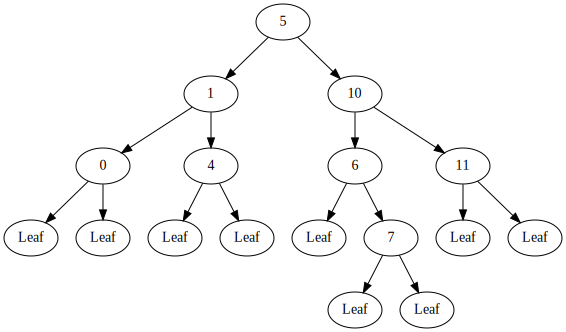

In [36]:
# naive BST
@dataclass
class TreeNode(Generic[a]):
    val : a
    l   : Optional[TreeNode[a]] = None
    r   : Optional[TreeNode[a]] = None

@dataclass
class BinTree(Generic[T]):
    tree : Optional[TreeNode[T]] = None


    def insert(self, x : T):
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            self.tree = TreeNode(x)
            return
        next_n : Optional[TreeNode[T]] = current
        while(next_n is not None):
            current = next_n 
            if x <= current.val:
                next_n = current.l
            else:
                next_n = current.r
                
        if x <= current.val:
            current.l = TreeNode(x)
        else:
            current.r = TreeNode(x)



    
    '''
    def insert(self,x : T):
        # nodo explorado actualmente
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            self.tree = TreeNode(x)
            return
        # siguiente nodo a explorar
        next_n : Optional[TreeNode[T]]  = current
        # 0 Izquierda | 1 Derecha
        direction : int = 0
        while(True):
            # casos bases
            # Si el siguiente nodo es none, entonces ya podemos insertar
            if next_n is None:
                # si la direccion es 0, entonces insertamos en la izquierda
                if direction == 0:
                    current.l = TreeNode(x)
                # si la direccion es 1, entonces insertamos en la derecha
                else:
                    current.r = TreeNode(x)
                return
            # Si el siguiente nodo NO es none, seguimos bajando por el arbol
            current = next_n
            # Si el valor es menor que el nodo exploraremos el nodo izquierdo
            if x <= current.val:
                next_n = current.l
                direction = 0
            # Si el valor es mayor que el nodo exploraremos el nodo  derecho
            else:
                next_n = current.r
                direction = 1
    '''
    
    def inorder(self) -> List[T]:
        res : List[T] = []
        self._inorder(res)
        return res

    def _inorder(self,res : List[T] = []):
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            return 
        wrapper_l : BinTree[T] = BinTree()
        wrapper_l.tree = current.l
        wrapper_l._inorder(res)
        res.append(current.val)
        wrapper_r : BinTree[T] = BinTree()
        wrapper_r.tree = current.r
        wrapper_r._inorder(res)

        return 
    
    def len(self) -> int:
        if self.tree is None:
            return 0
        wrapper_l : BinTree[T] = BinTree()
        wrapper_l.tree = self.tree.l
        wrapper_r : BinTree[T] = BinTree()
        wrapper_r.tree = self.tree.r

        return 1 + wrapper_l.len() + wrapper_r.len()

    def depth(self) -> int:
        if self.tree is None:
            return 0
        l : BinTree[T] = BinTree()
        l.tree = self.tree.l
        r : BinTree[T] = BinTree()
        r.tree = self.tree.r
        return 1 + max(l.depth(), r.depth())
    
    def level_order(self) -> List[List[Optional[T]]]:
        # Actual nodo a explorar
        current : Optional[Optional[TreeNode[T]]]       = self.tree
        # Respuesta, lista de nodos en level order traversal
        res     : List[List[Optional[T]]]               = []
        # Nodos que faltan por explorar
        nodes   : List[Optional[TreeNode[T]]]           = []
        # Proximos nodos a explorar
        next_n  : List[Optional[TreeNode[T]]]           = []

        if current is None:
            return []

        res.append([current.val])
        nodes = [current.l,current.r]

        # Mientras aun hayan nodos por explorar
        while(nodes != []):
            # Inicializa una lista con los elementos del nivel
            current_level : List[Optional[T]] = []
            # Y para cada nodo en los nodos por explorar
            for node in nodes:
                # chequea si es node, si es asi lo metemos
                if node is None:
                    current_level.append(None)
                    continue
                # si no es asi, metemos el valor, y expandimos los nodos pendientes
                # a sus hijos
                current_level.append(node.val)
                next_n.append(node.l)
                next_n.append(node.r)
            # los nodos por explorar seran los proximos
            nodes  = next_n
            next_n = []
            res.append(current_level)
        
        return res[:-1]

    def toPic(self) -> Digraph:
        dot : Digraph = graphviz.Digraph(comment='The Round Table')
        current : Optional[TreeNode[T]] = self.tree
        if current is None:
            return dot
        nodes   : List[Optional[Tuple[TreeNode[T],str]]]  = []
        next_n  : List[Optional[Tuple[TreeNode[T],str]]]  = []
        nodes.append((current,'c'))
        dot.node('c',str(current.val))
        while (nodes != []):
            next_n = []
            for mn in nodes:
                if mn is None:
                    continue
                (node,name) = mn
                if node.l is not None:
                    l_name = name+'l'
                    next_n.append((node.l,l_name))
                    dot.node(l_name,str(node.l.val))
                    dot.edge(name,l_name)
                else:
                    l_name = name+'l'
                    dot.node(l_name,"Leaf")
                    dot.edge(name,l_name)
                if node.r is not None:
                    r_name = name+'r'
                    next_n.append((node.r,r_name))
                    dot.node(r_name,str(node.r.val))
                    dot.edge(name,r_name)
                else:
                    r_name = name+'r'
                    dot.node(r_name,"Leaf")
                    dot.edge(name,r_name)
            nodes  = next_n
            
        
        #dot.render('tround-table.gv', view=True) 
        return dot
    
    def succ(self,x : T) -> Optional[T]:
        return x

tree : BinTree[int] = BinTree()

tree.insert(5)
tree.insert(10)
tree.insert(1)
tree.insert(0)
#tree.insert(-1)
tree.insert(4)
tree.insert(6)
tree.insert(11)
tree.insert(7)

# skewed tree
#for i in range(5):
#    tree.insert(i)


res : List[int] = []



# T(n) = 2*T(n/2) + O(n) ~n*log(n)
#current = self.tree
#left_sorted  = selt.tree.l.to_ord_list()
#right_sorted = selt.tree.r.to_ord_list()
#return left_sorted + right_sorted 

# In order traversal
#-1,0,1,4,5,6,7,10,11

tree.toPic()

#[[5],[1,10],[0,4,6,11],[7]]

# Breadth First Search
# Busqueda en Amplitud
# BFS
# [5]
# res = [[5]]
# next = [1,10]
# next = [[0,4],[6,11]] -> [0,4,6,11]
# res = [[5], [1,10]]

# bfs concatMap >> Instancia de Monada para listas

# infimo: La cota inferior mas grande
# supremo: la cota superior mas chiki


# Exercise: Invert a Binary Tree.

An inverted binary tree is a binary tree in which every left node is swapped with its right sibling:

<center>

![Inverted Binary Tree](./Images/invert_tree.jpg)

</center>

Invert a Binary Tree


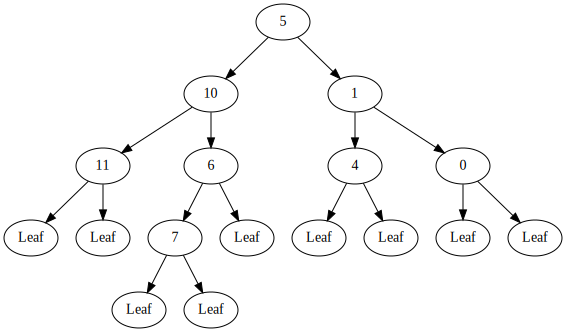

In [37]:
def invert(bin_tree : BinTree[T]):
    if bin_tree.tree is None:
        return
    
    bin_tree.tree.l, bin_tree.tree.r = bin_tree.tree.r, bin_tree.tree.l
    wrapper_l : BinTree[T]           = BinTree()
    wrapper_l.tree                   = bin_tree.tree.l
    wrapper_r : BinTree[T]           = BinTree()
    wrapper_r.tree                   = bin_tree.tree.r
    invert(wrapper_l)
    invert(wrapper_r)

invert(tree)
tree.toPic()

# Exercise: Symmetric Tree

Given a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

If the tree would be:
<center>

![Symmetric Tree](./Images/symtree1.jpg)

</center>

Then the result should be `True`, meanwhile, if the tree is:


<center>

![Symmetric Tree](./Images/symtree2.jpg)

</center>

The result would be `False`

In [ ]:
# sol

# Exercise: Validate Binary Tree

Given a binary tree, determine if it's a BST.

A **valid BST** is defined as follows:

- The left subtree of a node contains only nodes with keys less than the node's key.
- The right subtree of a node contains only nodes with keys greater than the node's key.
- Both the left and right subtrees must also be binary search trees

In [ ]:
# sol

# Exercise: From list to BST


Given a sorted list (ascending order), construct a BST.

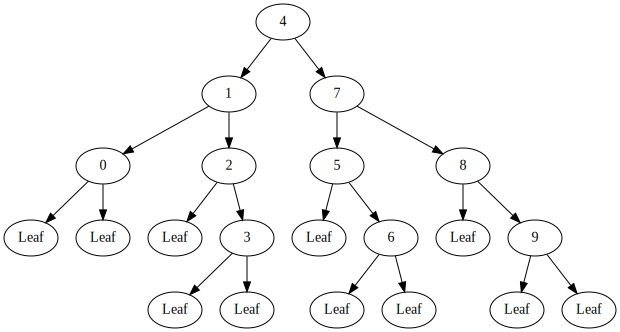

In [44]:
# O(log(n))
# 
# sol
#     4
#  2    5
# 1 3     6
xs = [x for x in range(10)]
tree : BinTree[int] = BinTree()
def fromList(xs : List[T],tree : BinTree[T]=BinTree() ):
    if xs == []:
        return
    if len(xs) <= 2:
        for elem in xs:
            tree.insert(elem)
        return 

    n : int = len(xs)
    a = 0
    b = n-1
    mid = (a+b) // 2
    tree.insert(xs[mid])
    fromList(xs[a:mid],tree=tree)
    fromList(xs[mid+1:],tree=tree)
[1,2,3,4,5,6,7,8,9,10]
fromList(xs,tree)
tree.toPic()


# inoder :: (a->a->b->b) -> Tree a -> b
# foldr     


# Populating Next Right Pointers in Each Node

You are given a perfect binary tree where all leaves are on the same level, and every parent has two children. 
Populate each value tuple to point to its next right node. If there is no next right node, the right value of the tuple should be set to NULL.

Initially, all right tuple values are set to NULL.

<center>

![Right pop](./Images/next_right.png)

</center>

In [ ]:
# sol

# Exercise: Vertical Order Traversal

Given a binary tree, calculate the vertical order traversal of the binary tree.

For each node at position `(row, col)`, its left and right children will be at positions `(row + 1, col - 1)` and `(row + 1, col + 1)` respectively. The root of the tree is at `(0, 0)`.

The vertical order traversal of a binary tree is a list of top-to-bottom orderings for each column index starting from the leftmost column and ending on the rightmost column. There may be multiple nodes in the same row and same column. In such a case, sort these nodes by their values.

Return the vertical order traversal of the binary tree.

For example:

<center>

![''](./Images/vtree1.jpg)

</center>


The vertical order would be: `[[9],[3,15],[20],[7]]` since:

- -9 is the only element in the column -1
- 3,15 are the only elements in the column 0
- 20 is the only element at the column 1
- 7 is the only element at column 2

 

In [15]:
#sol

# Exercise: Maximum Sum BST in Binary Tree

Given a binary tree (not necessarely a BST), return the maximum sum of all keys of **any sub-tree which is also a Binary Search Tree (BST)**.

For example:


<center>

![''](./Images/sub_bst.png)

</center>

The highlighted subtree yields the maximum sum.


In [14]:
# sol
# Heaps
# Implementacion de cola de prioridad
# Arboles AVL/ Rojo-Negro  <- Algoritmos 2
# 

# lista doblemenete enlazada con un puntero al ultimo elemento
stack -> Last in First Out 
# una lista
Queue -> First in First out 

# Grafos <- Algoritmos 3


In [16]:
# Nodos
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

# naive 
# Linked List
# O(log(n))
class LinkedList:
    # Valor inicial
    def __init__(self, value):
        new_node = Node(value)
        self.head = new_node
        self.tail = new_node
        self.length = 1

    # print list
    def print_list(self):
        temp = self.head
        while temp is not None:
            print(temp.value)
            temp = temp.next
    
    # Append to the right 
    def append(self, value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            self.tail = new_node
        self.length += 1
        return True

    # Pop to the right
    def pop(self):
        if self.length == 0:
            return None
        temp = self.head
        pre = self.head
        while(temp.next):
            pre = temp
            temp = temp.next
        self.tail = pre
        self.tail.next = None
        self.length -= 1
        if self.length == 0:
            self.head = None
            self.tail = None
        return temp

    # Append to the left
    def prepend(self, value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.next = self.head
            self.head = new_node
        self.length += 1
        return True

    # pop to the left
    def pop_first(self):
        if self.length == 0:
            return None
        temp = self.head
        self.head = self.head.next
        temp.next = None
        self.length -= 1
        if self.length == 0:
            self.tail = None
        return temp

    # Imitando el .index de nuestra LL de arriba 
    def get(self, index):
        if index < 0 or index >= self.length:
            return None
        temp = self.head
        for _ in range(index):
            temp = temp.next
        return temp
    
    # Haciendo SET en dado un index
    def set_value(self, index, value):
        temp = self.get(index)
        if temp:
            temp.value = value
            return True
        return False
    
    # Insertar un nodo en el medio 
    def insert(self, index, value):
        if index < 0 or index > self.length:
            return False
        if index == 0:
            return self.prepend(value)
        if index == self.length:
            return self.append(value)
        new_node = Node(value)
        temp = self.get(index - 1)
        new_node.next = temp.next
        temp.next = new_node
        self.length += 1   
        return True  

    # Eliminar de un nodo
    def remove(self, index):
        if index < 0 or index >= self.length:
            return None
        if index == 0:
            return self.pop_first()
        if index == self.length - 1:
            return self.pop()
        pre = self.get(index - 1)
        temp = pre.next
        # 1 -> 2 -> 3
        # pre = 1
        # temp = 2
        # pre.next = temp.next
        # 1 -> 3
        pre.next = temp.next
        temp.next = None
        self.length -= 1
        return temp
    
    # Invertir la linked link 
    def reverse(self):
        temp = self.head
        self.head = self.tail
        self.tail = temp
        after = temp.next
        before = None
        for _ in range(self.length):
            after = temp.next
            temp.next = before
            before = temp
            temp = after
  

test = LinkedList(1)
test.print_list()
print('--------------------')
test.append(2)
test.append(3)
test.append(4)
test.print_list()
print('--------------------')
test.reverse()
test.print_list()

1
--------------------
1
2
3
4
--------------------
4
3
2
1
